In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate
import numpy as np

from sklearn.mixture import GaussianMixture
from collections import Counter

In [2]:
df = pd.read_csv("Datasets/wholesale_customer_data/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [7]:
df.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

# Standardize the Data

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm = scaler.fit_transform(df)

In [9]:
norm = pd.DataFrame(norm, columns=df.columns)

In [10]:
norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


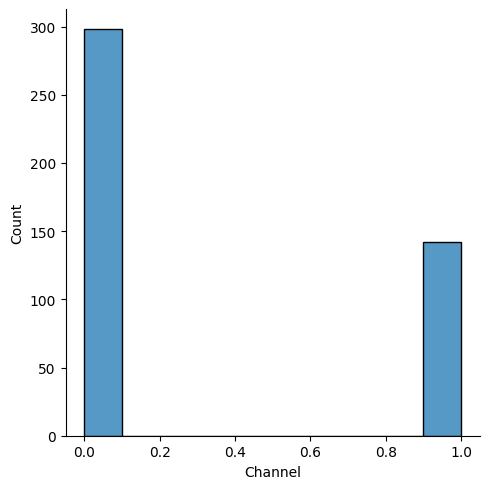

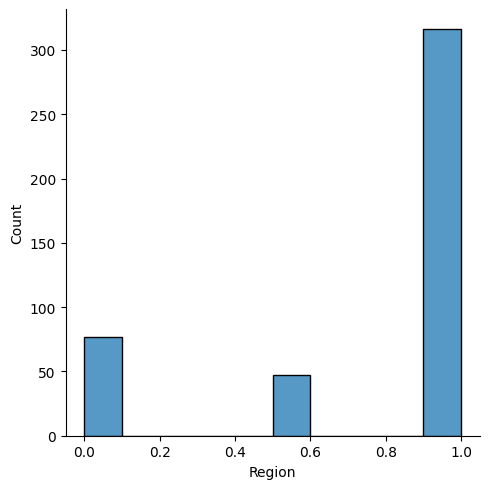

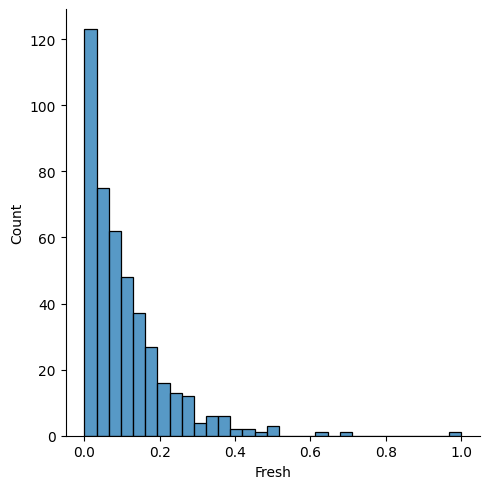

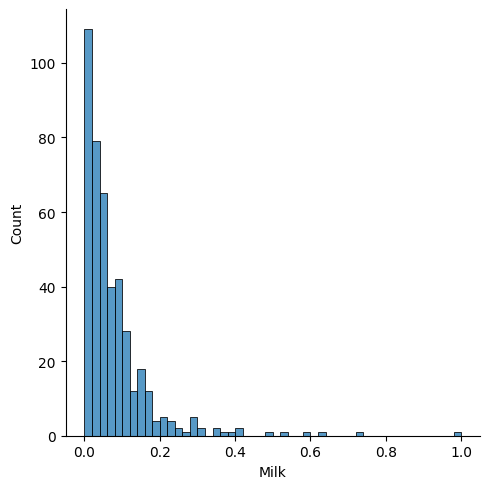

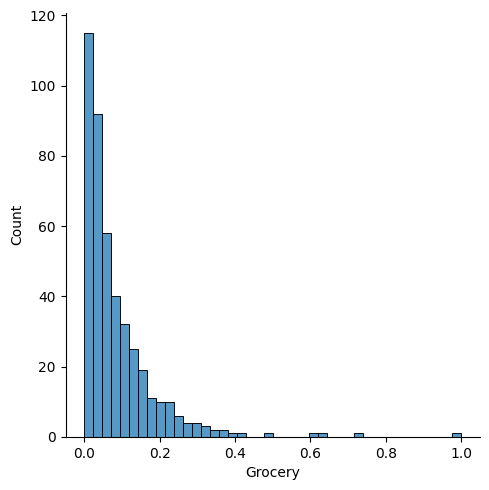

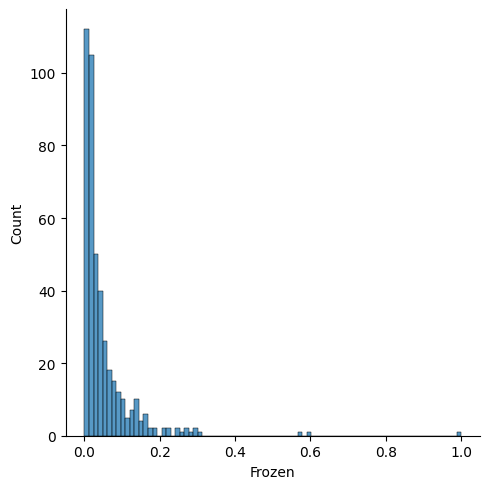

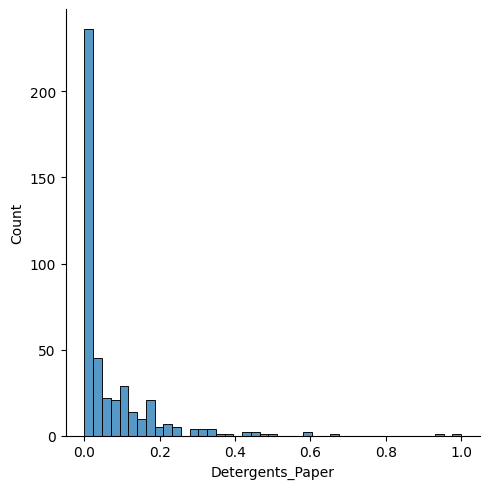

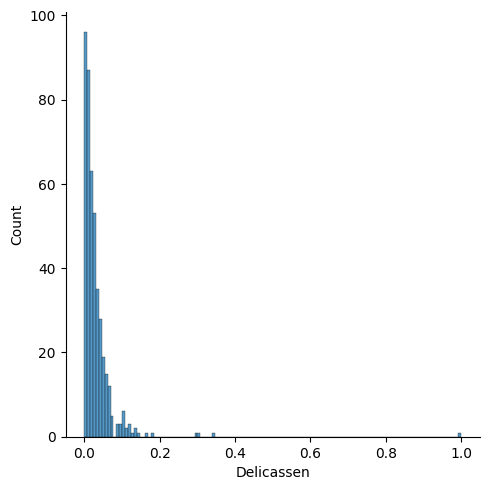

In [11]:
for key in norm.columns:
    fig = sns.displot(norm, x=key)

In [12]:
for each_col in df.columns:
    s = shapiro(norm[each_col])
    print (f"{each_col}: {s}")

Channel: ShapiroResult(statistic=0.5891129374504089, pvalue=6.237821428146971e-31)
Region: ShapiroResult(statistic=0.5926022529602051, pvalue=7.898492608711832e-31)
Fresh: ShapiroResult(statistic=0.7814362049102783, pvalue=7.91843824961924e-24)
Milk: ShapiroResult(statistic=0.6283338665962219, pvalue=9.762061919511109e-30)
Grocery: ShapiroResult(statistic=0.6762301325798035, pvalue=3.906127057558714e-28)
Frozen: ShapiroResult(statistic=0.528296947479248, pvalue=1.2913321191929252e-32)
Detergents_Paper: ShapiroResult(statistic=0.6054821610450745, pvalue=1.9145929126306173e-30)
Delicassen: ShapiroResult(statistic=0.36106783151626587, pvalue=1.7534077741301854e-36)


# GMM

In [16]:
elbow_results=[]
cluster_range = range(2,10)
for i in range(2,10):
    kmeans=GaussianMixture(init_params='k-means++' , n_components=i, random_state=0)
    results=cross_validate(kmeans, norm, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)

In [17]:
elbow_results

[-11.085579485312639,
 7941.21313341903,
 13336.955036317984,
 13336.633819524479,
 13335.790158092597,
 13335.889803405618,
 13336.756103084346,
 13907.91081451679]

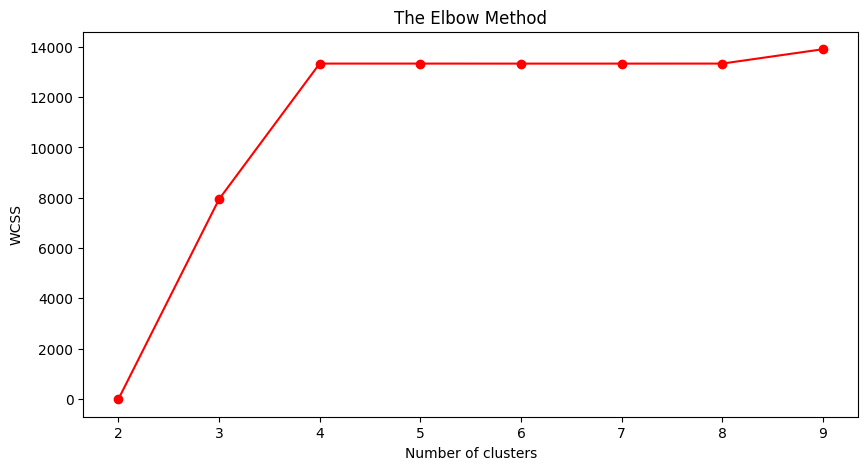

In [18]:
plt.figure(figsize=(10,5))
#sns.lineplot(elbow_results, marker='o',color='red')
plt.plot(cluster_range, elbow_results, marker='o',color='red')
plt.xticks(cluster_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal K looks to be 4

In [21]:
gmm = GaussianMixture(n_components = 4, init_params = "k-means++", random_state = 42,n_init=10)
gmm.fit(norm)
cluster_labels = gmm.predict(norm)

In [22]:
norm['clusters'] = cluster_labels
value_counts = norm['clusters'].value_counts()

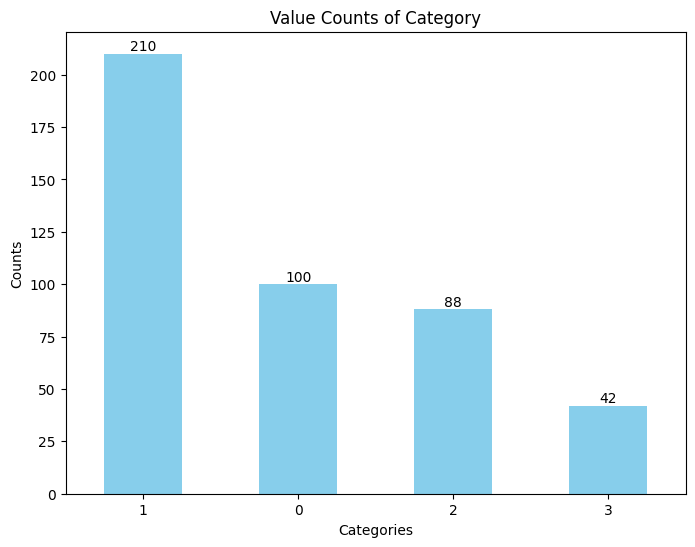

In [23]:
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue')

for i in ax.containers:
    ax.bar_label(i,)


plt.title('Value Counts of Category')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()


In [24]:
norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0


In [26]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

In [27]:
def measure_cluster_metrics(cluster_labels, y_true, title):
    
    ari = adjusted_rand_score(y_true, cluster_labels)
    nmi = normalized_mutual_info_score(y_true, cluster_labels)
    fmi = fowlkes_mallows_score(y_true, cluster_labels)
    print (title)
    print (ari, nmi, fmi)
    return ari, nmi, fmi

# Dimensionality Reduction

# 1. PCA

In [28]:
from sklearn.decomposition import PCA

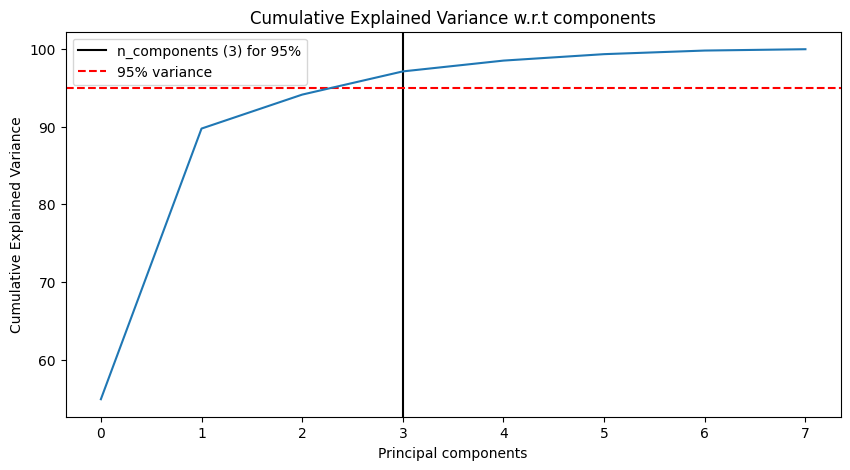

In [29]:
pca = PCA()
pca.fit(norm.iloc[:,:-1])

cum_variance = np.cumsum(pca.explained_variance_ratio_)*100

# Number of components that explain more than 95%
k = np.argmax(cum_variance > 95)

plt.figure(figsize=(10, 5))

plt.axvline(x=k, color='k', linestyle="-", label=f"n_components ({k}) for 95%")
plt.axhline(y=95, color='r', linestyle="--", label = "95% variance")
plt.plot(cum_variance)
plt.title("Cumulative Explained Variance w.r.t components")
plt.xlabel("Principal components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()

# 2D visualization

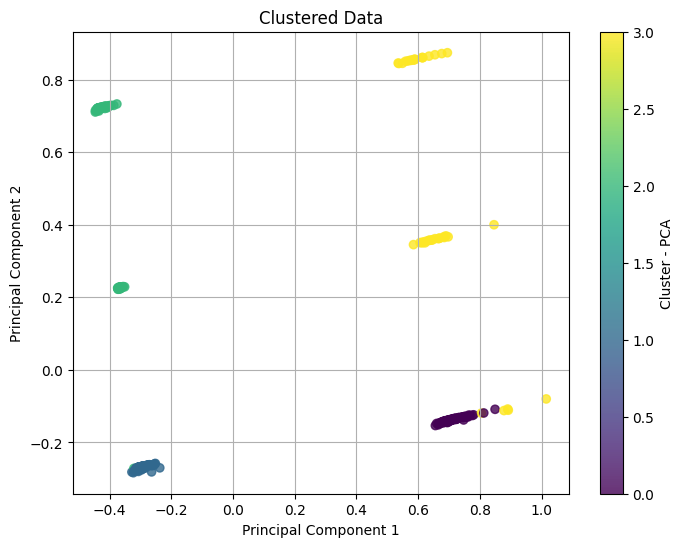

In [30]:
pca=PCA(n_components=2)

reduced_df = pca.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - PCA')
plt.grid(True)
plt.show()

## 2. ICA

In [31]:
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA

In [32]:
kurtosis_values = []
n_components_range = range(2,6)
for n in n_components_range:
    ica = FastICA(n_components=n)
    ica.fit(norm.iloc[:,:-1])
    kurtosis_components = kurtosis(ica.components_, axis=1)
    mean_kurtosis = np.mean(kurtosis_components)
    kurtosis_values.append(mean_kurtosis)

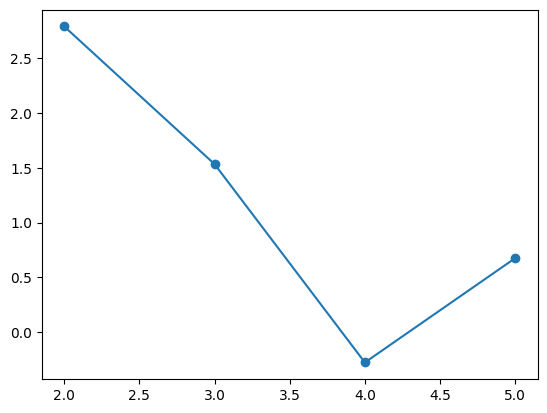

In [33]:
plt.plot([x for x in n_components_range], kurtosis_values, marker="o")

# 2D visualization

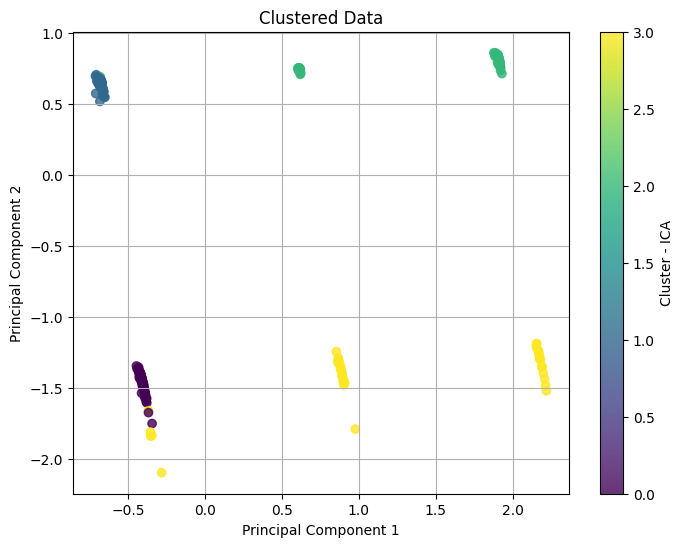

In [34]:
ica=FastICA(n_components=2)

reduced_df = ica.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - ICA')
plt.grid(True)
plt.show()

## 3. GaussianRandomized Projections

In [35]:
from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim

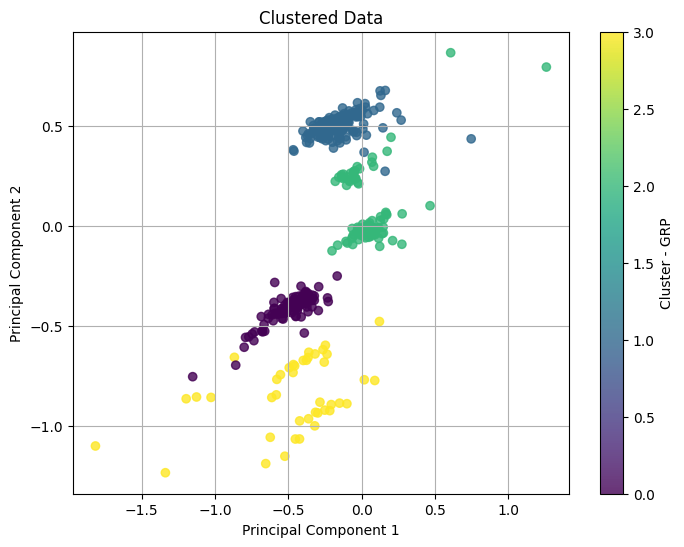

In [36]:
gauss_proj = GaussianRandomProjection(n_components=2)

#reduced_df = pd.DataFrame(reduced_data, columns=['Component1', 'Component2'])

reduced_df = gauss_proj.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - GRP')
plt.grid(True)
plt.show()

## 4. MDS

In [37]:
from sklearn.manifold import MDS

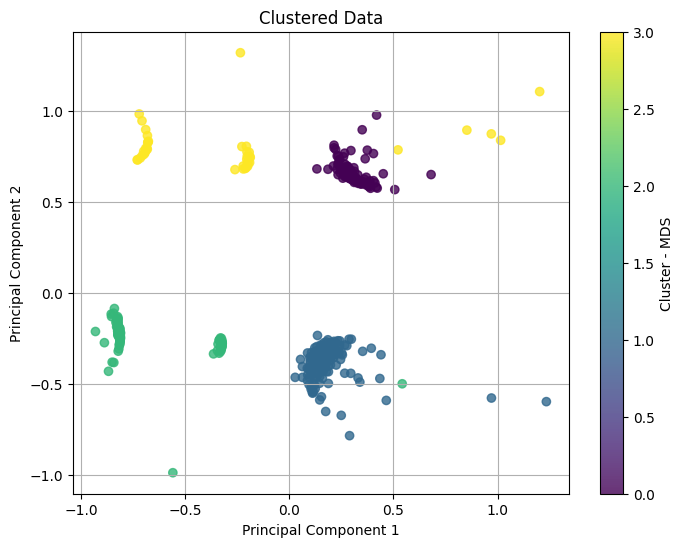

In [38]:
n_components = 2  # Reduce to 2 components
mds = MDS(n_components=n_components)

reduced_df = mds.fit_transform(norm.iloc[:,:-1])
reduced_df = pd.DataFrame(np.column_stack([reduced_df, norm.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['Comp1'], reduced_df['Comp2'], c=reduced_df.Cluster, cmap='viridis', alpha=0.8)
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster - MDS')
plt.grid(True)
plt.show()

In [39]:
def plot_cluster_distribution(cls_method, k_optimal, cluster_labels, dim_reduction = 'pca'):
    cluster_dict = Counter(cluster_labels)
    ax = sns.barplot(x=list(cluster_dict.keys()), y=list(cluster_dict.values()), color='skyblue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    for i in ax.containers:
        ax.bar_label(i,)
    title = f"wholesale-dataset - {dim_reduction} - {k_optimal}- {cls_method} "
    plt.title(title)
    plt.savefig(title)

# Clustering with reduced dimensions

In [40]:
# Reduce Dimensionality
def reduce_dim(X, target_dim = 100, algo='pca'):
    if algo == 'PCA':
        pca = PCA(n_components=target_dim)
        X_reduced = pca.fit_transform(X)
    elif algo == 'ICA':
        ica = FastICA(n_components=target_dim)
        X_reduced = ica.fit_transform(X)
    elif algo == 'GRP':
        projection_matrix = GaussianRandomProjection(n_components=target_dim)
        X_reduced = projection_matrix.fit_transform(X)
    else:
        mds = MDS(n_components=n_components)
        X_reduced = mds.fit_transform(X)
    return X_reduced

In [41]:
X_reduced_pca = reduce_dim(norm.iloc[:,:-1], algo='PCA', target_dim = 2)

In [42]:
X_reduced_ica = reduce_dim(norm.iloc[:,:-1], algo='ICA', target_dim = 2)

In [43]:
X_reduced_grp = reduce_dim(norm.iloc[:,:-1], algo='GRP', target_dim = 2)

In [44]:
X_reduced_mds = reduce_dim(norm.iloc[:,:-1], algo='MDS', target_dim = 2)

In [46]:
def run_gmm_experiment(X_reduced, dim_reduction):
    gmm = GaussianMixture(n_components = 4, init_params = "k-means++", random_state = 42,n_init=10)
    gmm.fit(X_reduced)
    cluster_labels = gmm.predict(X_reduced)
    plot_cluster_distribution("gmm", 2, cluster_labels, dim_reduction)
    return cluster_labels

# Clustering with reduced features

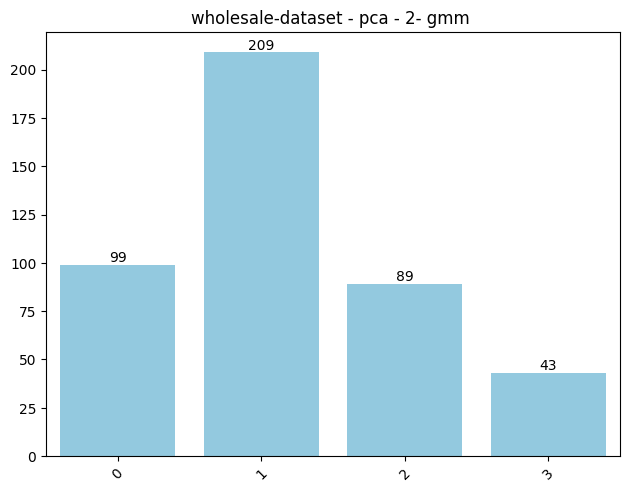

In [49]:
cluster_labels_pca = run_gmm_experiment(X_reduced_pca, dim_reduction='pca')

In [50]:
measure_cluster_metrics(cluster_labels_pca, cluster_labels, title = "PCA - k=4 - GMM")

PCA - k=4 - GMM
0.9693278662334557 0.9441036329446755 0.9793339625847993


(0.9693278662334557, 0.9441036329446755, 0.9793339625847993)

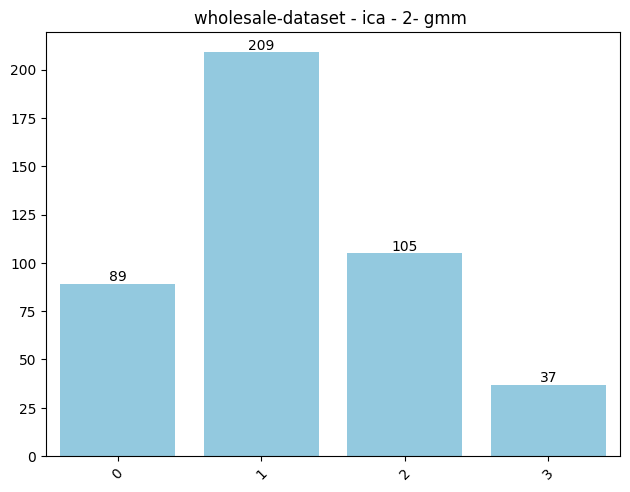

In [51]:
cluster_labels_ica = run_kmeans_experiment(X_reduced_ica, dim_reduction='ica')

In [52]:
measure_cluster_metrics(cluster_labels_ica, cluster_labels, title = "ICA - k=4 - GMM")

ICA - k=4 - GMM
0.963126192518728 0.9371472659548473 0.9752263128528545


(0.963126192518728, 0.9371472659548473, 0.9752263128528545)

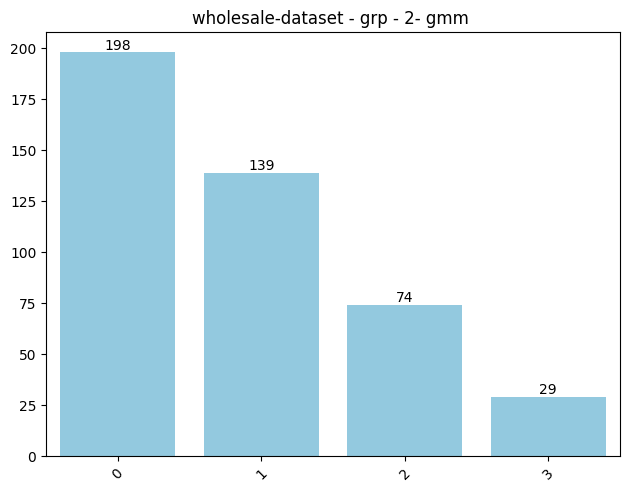

In [53]:
cluster_labels_grp = run_kmeans_experiment(X_reduced_grp, dim_reduction='grp')

In [54]:
measure_cluster_metrics(cluster_labels_grp, cluster_labels, title = "GRP - k=4 - GMM")

GRP - k=4 - GMM
0.7340369857155482 0.7198024890357732 0.8218931208916765


(0.7340369857155482, 0.7198024890357732, 0.8218931208916765)

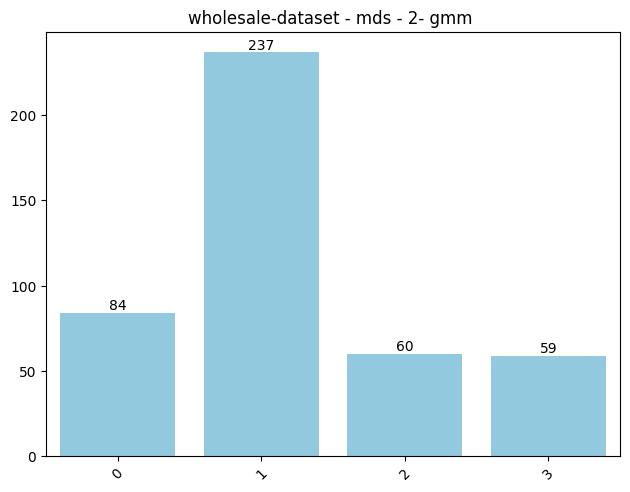

In [55]:
cluster_labels_mds = run_kmeans_experiment(X_reduced_mds, dim_reduction='mds')

In [56]:
measure_cluster_metrics(cluster_labels_mds, cluster_labels, title = "GRP - k=4 - GMM")

GRP - k=4 - GMM
0.7725395243285971 0.7744132406601902 0.8517499994846759


(0.7725395243285971, 0.7744132406601902, 0.8517499994846759)